In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.python.keras.utils.version_utils import training


In [3]:
df = pd.read_csv('datasets/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
224,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
603,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
538,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [9]:
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

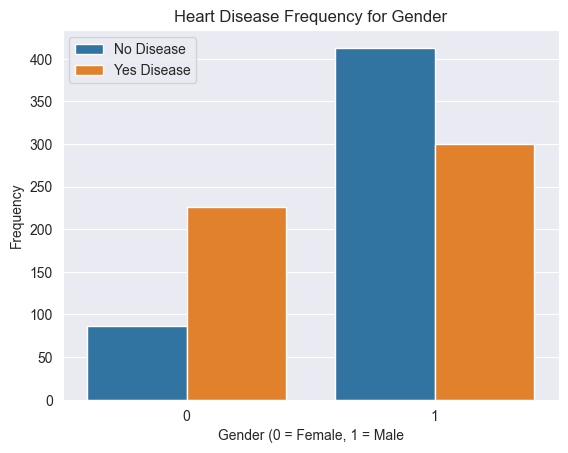

In [12]:
sns.countplot(x='sex', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(['No Disease', 'Yes Disease' ])

plt.xlabel('Gender (0 = Female, 1 = Male')
plt.ylabel('Frequency')

plt.show()

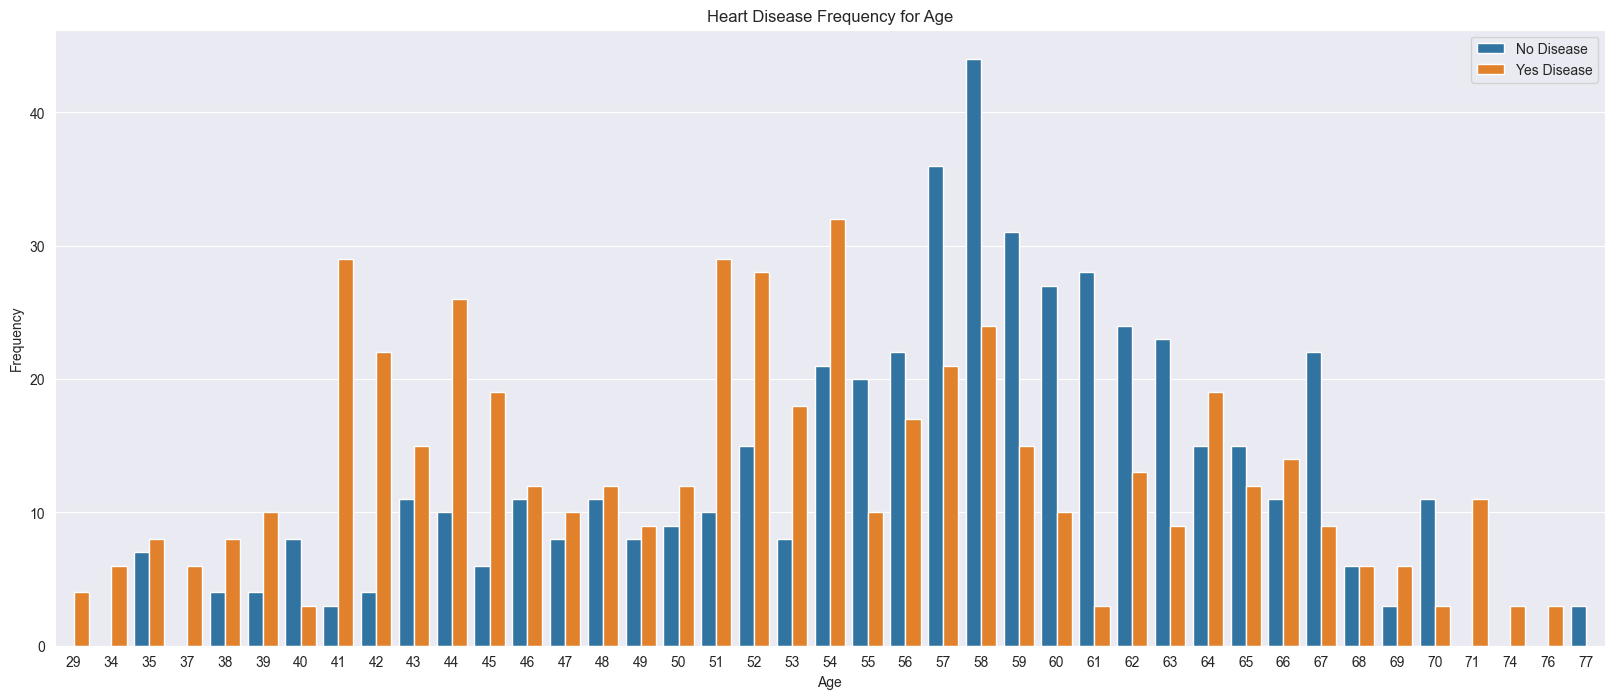

In [13]:
plt.figure(figsize = (20, 8))
sns.countplot(x='age', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Age')
plt.legend(['No Disease', 'Yes Disease' ])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

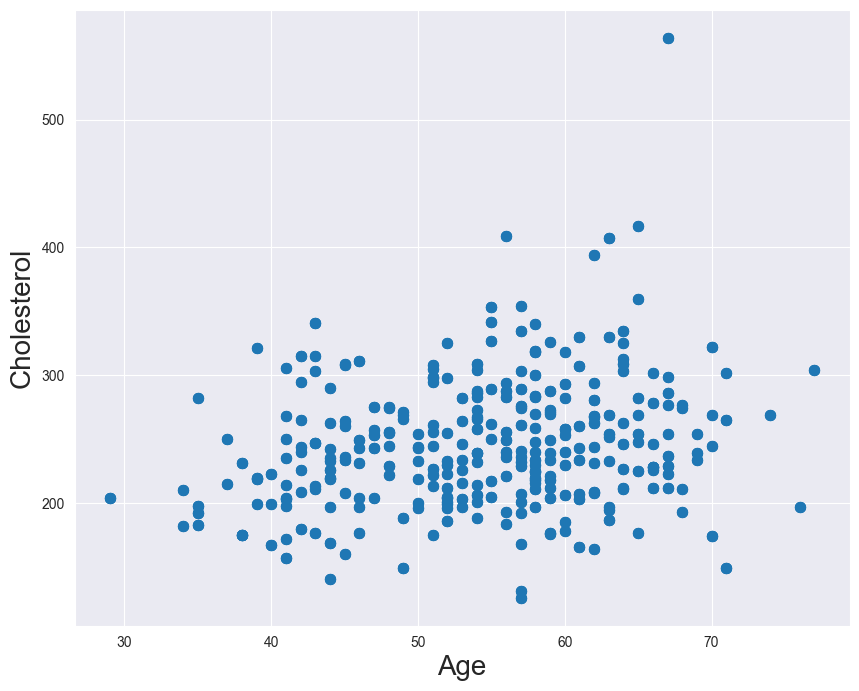

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(df['age'], df['chol'], s = 50)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholesterol', fontsize = 20)

plt.show()

In [17]:
features = df.drop('target', axis = 1)
target = df[[ 'target']]

In [18]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
816,70,1,1,156,245,0,0,143,0,0.0,2,0,2
494,51,1,2,125,245,1,0,166,0,2.4,1,0,2
565,53,0,0,138,234,0,0,160,0,0.0,2,0,2
41,54,1,2,120,258,0,0,147,0,0.4,1,0,3
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2


In [19]:
target.sample(10)

,target
623,0
979,0
535,1
793,1
29,0
351,0
790,0
714,1
438,1
935,1


In [20]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()
categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,0,0,0,2,2,3,1
1,1,1,1,0,0,0,3,0
2,1,0,1,0,0,0,3,1
3,1,0,0,0,1,2,3,1
4,0,1,0,0,3,1,2,1


In [21]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [27]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns = numeric_features.columns, 
                                index = numeric_features.index)
numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,3.119456e-17,-6.932124e-18,-3.466062e-18,3.466062e-17,-6.932124e-18
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-3.397080e+00,-9.123291e-01
25%,-7.095548e-01,-6.632165e-01,-6.787242e-01,-7.442713e-01,-9.123291e-01
50%,1.726817e-01,-9.205458e-02,-1.163527e-01,1.255019e-01,-2.311765e-01
75%,7.240794e-01,4.791073e-01,5.623715e-01,7.343432e-01,6.202642e-01
max,2.488552e+00,3.906079e+00,6.166694e+00,2.299935e+00,4.366603e+00


In [29]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)
processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1,0,0,0,2,2,3,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,1,1,0,0,0,3,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,1,0,1,0,0,0,3,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,1,0,0,0,1,2,3,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,0,3,1,2,1


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size = 0.2, random_state = 1)

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 10)

In [32]:
x_train.shape, x_val.shape, x_test.shape

((697, 13), (123, 13), (205, 13))

In [33]:
y_train.shape, y_val.shape, y_test.shape

((697, 1), (123, 1), (205, 1))

In [34]:
def build_model():
    
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    dense_layer1 = layers.Dense(12, activation = 'relu')
    x = dense_layer1(inputs)
    
    dropout_layer = layers.Dropout(0.2)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation = 'relu')
    x = dense_layer2(x)
    
    prediction_layer = layers.Dense(1, activation = 'sigmoid')
    predictions = prediction_layer(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = predictions)
    
    model.summary()
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = ['accuracy', 
                             tf.keras.metrics.Precision(0.5),
                             tf.keras.metrics.Recall(0.5)])
    
    return model

In [35]:
model = build_model()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

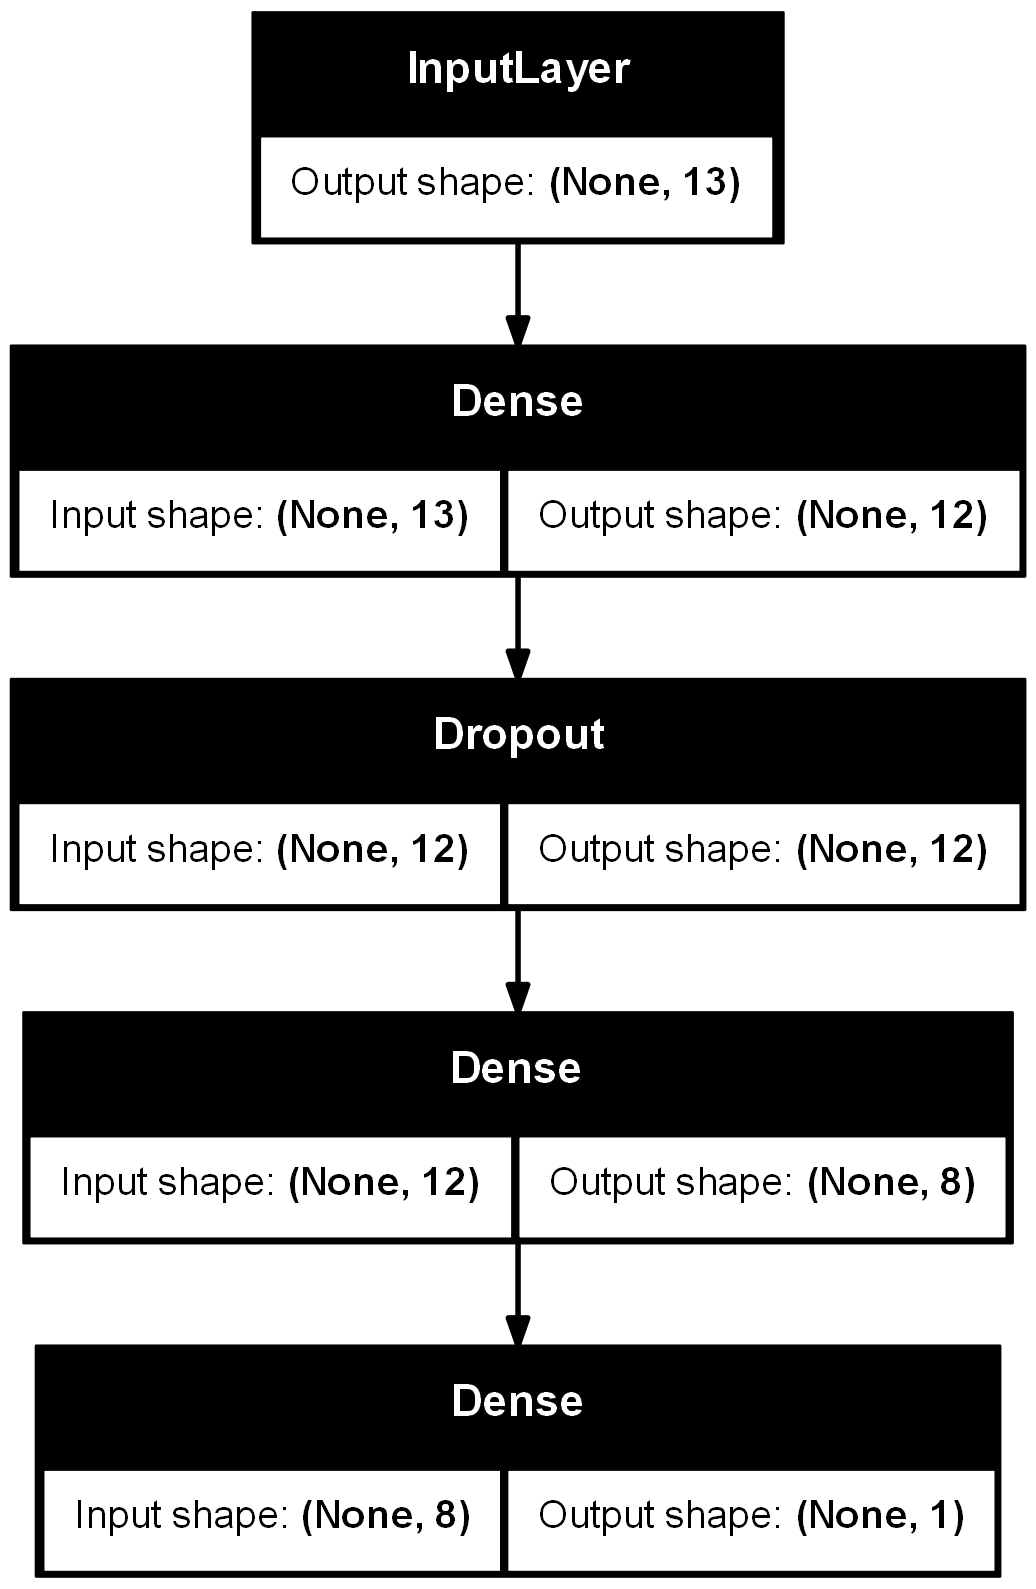

In [36]:
keras.utils.plot_model(model, show_shapes=True)

In [37]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)
dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [38]:
num_epochs = 100

In [39]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [40]:
training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5310 - loss: 0.7375 - precision: 0.5026 - recall: 0.2137 - val_accuracy: 0.6260 - val_loss: 0.6708 - val_precision: 0.7222 - val_recall: 0.4194
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 0.6786 - precision: 0.5720 - recall: 0.5537 - val_accuracy: 0.6748 - val_loss: 0.6294 - val_precision: 0.7200 - val_recall: 0.5806
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.6440 - precision: 0.6239 - recall: 0.6530 - val_accuracy: 0.6992 - val_loss: 0.5944 - val_precision: 0.6984 - val_recall: 0.7097
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 0.6333 - precision: 0.6152 - recall: 0.7002 - val_accuracy: 0.7236 - val_loss: 0.5661 - val_precision: 0.7188 - val_recall: 0.7419
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5924 - precision: 0.6710 - recall: 0.7539 - val_accuracy: 0.7398 - val_loss: 0.5354 

In [43]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

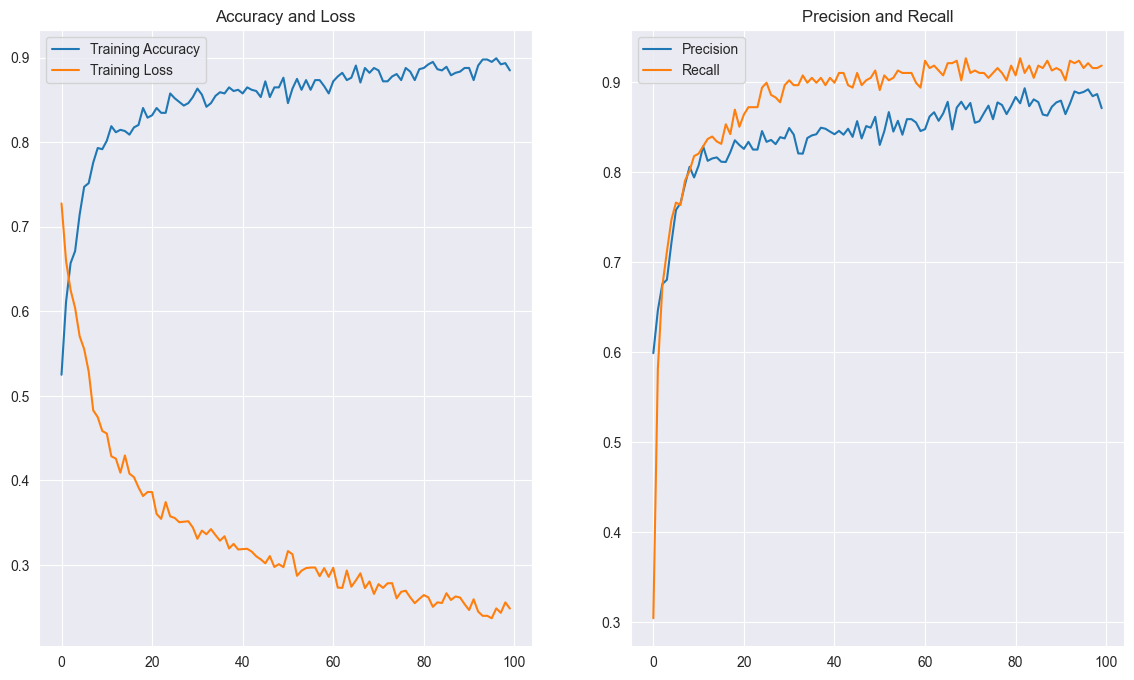

In [45]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision']
recall = training_history.history['recall']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

plt.show()


In [50]:
score = model.evaluate(x_test, y_test)
score_df = pd.Series(score)
score_df

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8958 - loss: 0.2008 - precision: 0.8562 - recall: 0.9442 


0    0.217274
1    0.892683
2    0.849057
3    0.937500
dtype: float64

In [51]:
y_pred = model.predict(x_test)
y_pred[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.00219505],
       [0.95709836],
       [0.9975852 ],
       [0.28444326],
       [0.10236596],
       [0.85418785],
       [0.7872453 ],
       [0.6919893 ],
       [0.5366868 ],
       [0.93905926]], dtype=float32)

In [52]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

In [54]:
y_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [57]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten().astype('int32')}, index=range(len(y_pred)))

In [58]:
pred_results.sample(10)

,y_test,y_pred
118,1,1
134,1,1
100,1,1
140,0,0
74,1,1
9,1,1
189,0,0
31,1,0
67,0,0
144,0,0


In [59]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,93,6
1,16,90
